<h1 style="text-align: center">
Machine Learning HW1 </br>
MLE & MAP in Python
</h1>

#### Name: Alireza Habibzadeh

#### Std. Number: `99109393`

## Objective
This exercise will help you gain a deeper understanding of, and insights into, Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation$\textit{Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) }$ :) \\
Let’s say you have a barrel of apples that are all different sizes. You pick an apple at random, and you want to know its weight. Unfortunately, all you have is a broken scale. answer the questions below.

1) For the sake of this section, lets imagine a farmer tells you that the scale returns the weight of the object with an error of +/- a standard deviation of 5g. We can describe this mathematically as:
$$
measurement = weight + \mathcal{N}(0, 5g)
$$
You can weigh the apple as many times as you want, so weigh it 100 times.
plot its histogram of your 100 measurements. (y axis is the counts and x-axis is the measured weight)

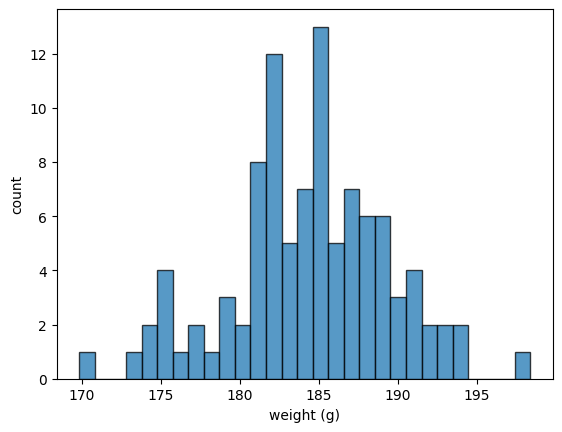

In [49]:
import matplotlib.pyplot as plt
import numpy as np
weight = 184
sd = 5
measurements = np.random.normal(loc=weight, scale=sd, size=100) # Same as weight + np.random.normal(...

plt.hist(measurements, bins=int(measurements.max() - measurements.min() + 1), edgecolor='k', alpha=0.75)
plt.xlabel('weight (g)')
plt.ylabel('count')
plt.show()

2) Find the average weight of the apple.
Is it a good guess? state your reason.

In [52]:
average_weight = np.mean(measurements)
print(f'Average weight: {np.mean(measurements):.2f} g')
print(f'Relative error: {np.abs((np.mean(measurements) - weight) / weight) * 100:.2f} %')

Average weight: 184.38 g
Relative error: 0.21 %


It is a very good guess. This is the best guess we can have with this amount of data (and not having ant prior knowledge about the weight). Also the relative error came out to be very low:

$$ \langle w \rangle = \frac{\sum{w_i}}{N} = 184.38 \mathrm{g}$$

$$ |\frac{w - \langle w \rangle}{w}| = 0.21 \%$$

3) we are going to use grid approximation for calculating the MLE. here is the link if you wnat to get more fimilar with this technique:
https://www.bayesrulesbook.com/chapter-6

Our end goal is to find the weight of the apple, given the data we have. To formulate it in a Bayesian way: We’ll ask what is the probability of the apple having weight, $w$, given the measurements we took, $X$. And, because we're formulating this in a Bayesian way, we use Bayes’ Law to find the answer:

$$
P(w|X) = \frac{P(X|w)P(w)}{P(X)}
$$

If we make no assumptions about the initial weight of our apple, then we can drop $P(w)$. We’ll say all sizes of apples are equally likely (we’ll revisit this assumption in the MAP approximation).

Furthermore, we’ll drop $P(X)$ - the probability of seeing our data. This is a normalization constant and will be important if we do want to know the probabilities of apple weights. But, for right now, our end goal is to only to find the most probable weight. $P(X)$ is independent of $w$, so we can drop it if we’re doing relative comparisons.

This leaves us with $P(X|w)$, our likelihood, as in, what is the likelihood that we would see the data, $X$, given an apple of weight $w$. If we maximize this, we maximize the probability that we will guess the right weight.

The grid approximation is probably the simplest way to do this. Basically, we’ll systematically step through different weight guesses, and compare what it would look like if this hypothetical weight were to generate data. We’ll compare this hypothetical data to our real data and pick the one that matches the best.

To formulate this mathematically:

For each of these guesses, we’re asking "what is the probability that the data we have, came from the distribution that our weight guess would generate". Because each measurement is independent from another, we can break the above equation down into finding the probability on a per measurement basis:

$$
P(X|w) = \prod_{i}^{N} p(x_i|w)
$$

So, if we multiply the probability that we would see each individual data point - given our weight guess - then we can find one number comparing our weight guess to all of our data.

The peak in the likelihood is the weight of the apple.

To make it computationally easier,

$$
\log P(X|w) = \log \prod_{i}^{N} p(x_i|w) = \sum_{i}^{N} \log p(d_i|w)
$$



a) Why did we use log likelihood? Is it ok to do so?

b) do the grid approximation and complete the cell below

### Answer:
Yes, since

$$ \frac{\partial \log{f}}{\partial x_i} = \frac{1}{f} \cdot \frac{\partial f}{\partial x_i}$$

, as long as $f > 0$ (which in case of likelihood it is), $\log{}$ is an strictly monotonously increasing function maximizing $\log{f(\textbf{x})}$ is equivalent to maximizing $f(\textbf{x})$.

In [76]:
from scipy.stats import norm
import numpy as np

weight_grid = np.linspace(0, 200, 101)
    
weight_MLE = weight_grid[np.argmax(
        [np.sum(norm.logpdf(measurements, loc=guess, scale=10)) for guess in weight_grid])] 

print(f'Maximum Likelihood Estimate (MLE) of weight: {weight_MLE} g')

# Calculate the maximum likelihood estimate of a parameter in a normal distribution.
# First calculate the log likelihoods for a range of weight guesses.
# For each weight guess, assume that the data comes from a normal distribution with that mean and a standard deviation of 10.
# Then calculate the log of the probability density function (pdf) of the data under this assumption.
# The sum of these log pdf values is the total log likelihood for that weight guess.
# After calculating the log likelihoods for all weight guesses, find the weight guess with the maximum log likelihood.
# This is the maximum likelihood estimate of the weight.

Maximum Likelihood Estimate (MLE) of weight: 184.0 g


### Answer:
The result is same as the real value. This is since we don't have a fine grid and all tested values are integer. We would have got $184.4 g$ if we didn't limit ourselves to integer weights `np.linspace(0, 200, 1001)`. This is like having prior knowledge that $w$ is integer.

Play around with the code and try to answer the following questions regarding MLE and MAP. You can draw plots to visualize as well.

Average measurement: 88.865 g


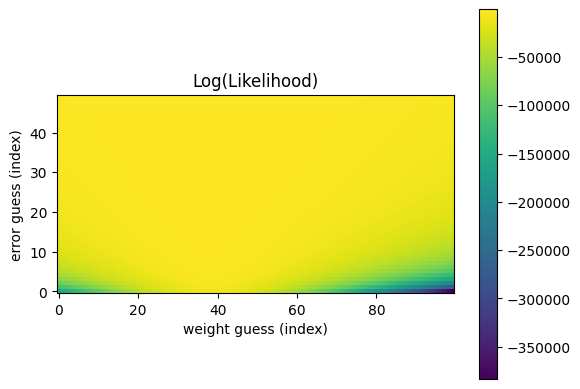

Maximum Likelihood estimate: 88.384 g


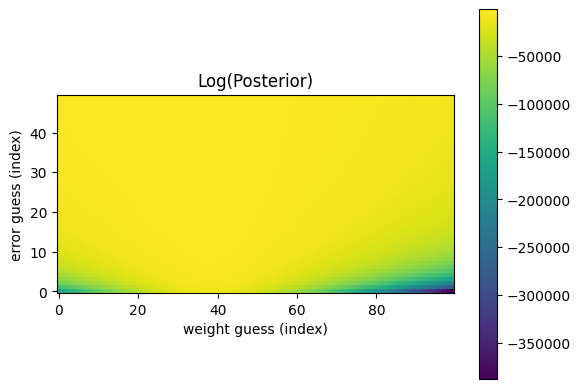

Maximum A Posterior estimate: 77.273 g
The true weight of the apple was: 88.871 g


In [155]:
import numpy as np
from scipy.stats import norm, invgamma, uniform


# The barrel of apples
# The average apples is between 70-100 g (WRONG!)
BARREL = np.random.normal(loc=85, scale=20, size=100)
# Grid
WEIGHT_GUESSES = np.linspace(50, 150, 100)
ERROR_GUESSES = np.linspace(1, 10, 50)

# NOTE: Try changing the scale error
# in practice, you would not know this number
SCALE_ERR = 10

# NOTE: Try changing the number of measurements taken
N_MEASUREMENTS = 200

# NOTE: Try changing the prior values and distributions
PRIOR_WEIGHT = norm(55, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)

# More realistic prior IMO
# PRIOR_WEIGHT = uniform(70, 100).logpdf(WEIGHT_GUESSES)
# PRIOR_ERR = norm(10, 5).logpdf(ERROR_GUESSES)

LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)


def read_scale(apple):
    return apple + np.random.normal(loc=0, scale=SCALE_ERR)


def get_log_likelihood_grid(measurements):
    log_likelihood = [
        [
            norm(weight_guess, error_guess).logpdf(measurements).sum()
            for weight_guess in WEIGHT_GUESSES
        ]
        for error_guess in ERROR_GUESSES
    ]
    return np.asarray(log_likelihood)


def grid_heatmap(grid):
    plt.imshow(grid, origin='lower')
    plt.xlabel('weight guess (index)')
    plt.ylabel('error guess (index)')
    plt.colorbar()
    plt.show()
    
    
def get_mle(measurements):
    """
    Calculate the log-likelihood for each measurement in the grid.
    Find the index of the maximum log-likelihood in the grid.
    Return the weight guess corresponding to the maximum log-likelihood.
    """
    grid = get_log_likelihood_grid(measurements)
    plt.title('Log(Likelihood)')
    grid_heatmap(grid)
    
    return WEIGHT_GUESSES[np.unravel_index(np.argmax(grid), grid.shape)[1]]


def get_map(measurements):
    """
    Calculate the log-likelihood for each measurement in the grid.
    Add the log prior to the log likelihood to get the log posterior.
    Find the index of the maximum log posterior in the grid.
    Return the weight guess corresponding to the maximum log posterior.
    """
    grid = get_log_likelihood_grid(measurements) + LOG_PRIOR_GRID
    plt.title('Log(Posterior)')
    grid_heatmap(grid)
    
    return WEIGHT_GUESSES[np.unravel_index(np.argmax(grid), grid.shape)[1]]
    

# Pick an apple at random
apple = np.random.choice(BARREL)

# weight the apple
measurements = np.asarray([read_scale(apple) for _ in range(N_MEASUREMENTS)])

print(f"Average measurement: {measurements.mean():.3f} g")
print(f"Maximum Likelihood estimate: {get_mle(measurements):.3f} g")
print(f"Maximum A Posterior estimate: {get_map(measurements):.3f} g")
print(f"The true weight of the apple was: {apple:.3f} g")

<h3><i><i> Questions</h3>
1.
How sensitive is the MAP measurement to the choice of prior?

Not much because I measure a lot (200 times). If I measure less, the prior would have more effect on the result.
It also depends on the value of the prior. If the prior says $P = 0$ then $\log{P} \to - \infty$ and it is effective no matter how many data points I have.

<h3><i><i></h3>
2. How sensitive is the MLE and MAP answer to the grid size?

As the heatmap shows, the distributions are smooth enough that both MLE and MAP won't *lose* the minimum if the grid is not fine enough. But the resulting estimate can only be one of the points of the grid, so a non-accurate grid will lead to a non-accurate estimation. (Like if the real value is 84.3 and we only have 83, 84, 85,... we can not get a better result than 84) 